1. Importing the required libraries for EDA
Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

2. Loading the data into the data frame.

In [28]:
df = pd.read_csv('D:/TI2022/metacritic best tv shows of all time.csv',sep=';', engine='python') #leemos el archivo elegido y configuramos el formato en el  que se encuentra/content/drive/pre-processed-users1.1.tsv') as f:
df.set_index('rank',inplace=True)#asignamos a rank como indice
df['release']= pd.to_datetime(df['release'])#le damos el formato correcto de fecha
df['year'] = df['release'].dt.strftime("%Y")#extraemos como string los años esto depende de la manera en el que vas a usar la fecha, pero tiene que ser datatime
#lista de condiciones p ara medir la metrica metascore de las series de la pagina metrics
df['metascore']= pd.to_numeric(df['metascore'])#le damos el formato correcto de fecha
df['userscore']= pd.to_numeric(df['userscore'])#le damos el formato correcto de fecha

conditionlist = [   
(df['metascore'] >= 0) & (df['metascore'] <=19),
(df['metascore'] >= 20) & (df['metascore'] <=39),#cree una lista de condiciones para la columna metascore y luego las asigne en una nueva columna, también depende del tipo de dato de tu columna
(df['metascore'] >= 40) & (df['metascore'] <=60),
(df['metascore'] >= 61) & (df['metascore'] <=80),
(df['metascore'] >= 81) & (df['metascore'] <=100)]
choicelist = ['Aversión abrumadora','Críticas generalmente desfavorables','Reseñas mixtas o promedio', #nombre de las condiciones dada por la pagina wiki
        ' Críticas generalmente favorables','Aclamación universal']
df['Indicadores_Metascore'] = np.select(conditionlist, choicelist, default='Not Specified') #select Devuelve una matriz extraída de elementos de choicelist, según las condiciones.


conditionlist = [   
(df['userscore'] >= 0.0) & (df['userscore'] <=1.9),
(df['userscore'] >= 2.0) & (df['userscore'] <=3.9),#cree una lista de condiciones para la columna metascore y luego las asigne en una nueva columna, también depende del tipo de dato de tu columna
(df['userscore'] >= 4.0) & (df['userscore'] <=6.0),
(df['userscore'] >= 6.1) & (df['userscore'] <=8.0),
(df['userscore'] >= 8.1) & (df['userscore'] <=9.9)]
choicelist = ['Mala o sin Clasificación','No muy buena','Buena','Muy buena', #nombre de las condiciones dada por la pagina wiki
        'Excelente']
df['Clasificación_Puntuación_Usuario'] = np.select(conditionlist, choicelist, default='Not Specified') #select Devuelve una matriz extraída de elementos de choicelist, según las condiciones.


In [29]:
df.head(5)


,title,release,summary,metascore,userscore,link,img_url,year,Indicadores_Metascore,Clasificación_Puntuación_Usuario
rank,,,,,,,,,,
1,Rectify: Season 4,2016-10-26,Daniel tries to start a new life outside of Pa...,99,8.7,https://www.metacritic.com/tv/rectify/season-4,https://static.metacritic.com/images/products/...,2016,Aclamación universal,Excelente
2,The Larry Sanders Show: Season 4,1995-07-19,Comic Garry Shandling draws upon his own talk ...,99,5.8,https://www.metacritic.com/tv/the-larry-sander...,https://static.metacritic.com/images/products/...,1995,Aclamación universal,Buena
3,Murder One: Season 1,1995-09-19,One of several crime and law dramas created by...,99,6.4,https://www.metacritic.com/tv/murder-one/season-1,https://static.metacritic.com/images/products/...,1995,Aclamación universal,Muy buena
4,The Larry Sanders Show: Season 6,1998-03-15,Comic Garry Shandling draws upon his own talk ...,99,5.5,https://www.metacritic.com/tv/the-larry-sander...,https://static.metacritic.com/images/products/...,1998,Aclamación universal,Buena
5,Breaking Bad: Season 5,2012-07-15,The final season for the award-winning drama b...,99,9.6,https://www.metacritic.com/tv/breaking-bad/sea...,https://static.metacritic.com/images/products/...,2012,Aclamación universal,Excelente


In [30]:
df.tail(5)


,title,release,summary,metascore,userscore,link,img_url,year,Indicadores_Metascore,Clasificación_Puntuación_Usuario
rank,,,,,,,,,,
3080,Work It : Season 1,2012-01-03,"After they are laid off, Lee Standish (Ben Kol...",19,0.9,https://www.metacritic.com/tv/work-it/season-1,https://static.metacritic.com/images/products/...,2012,Aversión abrumadora,Mala o sin Clasificación
3081,Category 7: The End of the World: Season 1,2005-11-06,"This killer-storm disaster sequel to ""Category...",18,3.7,https://www.metacritic.com/tv/category-7-the-e...,https://static.metacritic.com/images/products/...,2005,Aversión abrumadora,No muy buena
3082,Stalker: Season 1,2014-10-01,Lt. Beth Davis (Maggie Q) leads the Threat Ass...,17,7.4,https://www.metacritic.com/tv/stalker/season-1,https://static.metacritic.com/images/products/...,2014,Aversión abrumadora,Muy buena
3083,Dads: Season 1,2013-09-17,In this live-action comedy from producer Seth ...,15,3.8,https://www.metacritic.com/tv/dads/season-1,https://static.metacritic.com/images/products/...,2013,Aversión abrumadora,No muy buena
3084,The 1/2 Hour News Hour: Season 1,2007-02-18,"The right-wing answer to ""The Daily Show With ...",13,2.8,https://www.metacritic.com/tv/the-12-hour-news...,https://static.metacritic.com/images/products/...,2007,Aversión abrumadora,No muy buena


3. Checking the types of data


In [31]:
df.dtypes

title                                       object
release                             datetime64[ns]
summary                                     object
metascore                                    int64
userscore                                  float64
link                                        object
img_url                                     object
year                                        object
Indicadores_Metascore                       object
Clasificación_Puntuación_Usuario            object
dtype: object

4. Dropping irrelevant columns


In [32]:
df = df.drop(['img_url', 'link','summary'], axis=1)
df.head(5)

,title,release,metascore,userscore,year,Indicadores_Metascore,Clasificación_Puntuación_Usuario
rank,,,,,,,
1,Rectify: Season 4,2016-10-26,99,8.7,2016,Aclamación universal,Excelente
2,The Larry Sanders Show: Season 4,1995-07-19,99,5.8,1995,Aclamación universal,Buena
3,Murder One: Season 1,1995-09-19,99,6.4,1995,Aclamación universal,Muy buena
4,The Larry Sanders Show: Season 6,1998-03-15,99,5.5,1998,Aclamación universal,Buena
5,Breaking Bad: Season 5,2012-07-15,99,9.6,2012,Aclamación universal,Excelente


In [33]:
df.drop(df.index[df['metascore'] == 0], inplace = True)


In [34]:
df.drop(df.index[df['userscore'] == 0.0], inplace = True)


5. Renaming the columns


In [35]:
df = df.rename(columns={"rank":"Id","title":"Título_Series","release":"Fecha_Estreno","summary":"Resumen","metascore":"Numeración_Críticas","userscore":"Puntuación_Usuario","year":"Año_Estreno","Indicadores_Metascore":"Categorías_Critícas_TV","Clasificación_Puntuación_Usuario":"Clasificación_Puntuación_Usuario"}) 
df.head(5)

,Título_Series,Fecha_Estreno,Numeración_Críticas,Puntuación_Usuario,Año_Estreno,Categorías_Critícas_TV,Clasificación_Puntuación_Usuario
rank,,,,,,,
1,Rectify: Season 4,2016-10-26,99,8.7,2016,Aclamación universal,Excelente
2,The Larry Sanders Show: Season 4,1995-07-19,99,5.8,1995,Aclamación universal,Buena
3,Murder One: Season 1,1995-09-19,99,6.4,1995,Aclamación universal,Muy buena
4,The Larry Sanders Show: Season 6,1998-03-15,99,5.5,1998,Aclamación universal,Buena
5,Breaking Bad: Season 5,2012-07-15,99,9.6,2012,Aclamación universal,Excelente


6. Dropping the duplicate rows
This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.


In [36]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 7)


In [37]:
df.count()

Título_Series                       2819
Fecha_Estreno                       2819
Numeración_Críticas                 2819
Puntuación_Usuario                  2819
Año_Estreno                         2819
Categorías_Critícas_TV              2819
Clasificación_Puntuación_Usuario    2819
dtype: int64

In [38]:
df = df.drop_duplicates()
df.head(5)


,Título_Series,Fecha_Estreno,Numeración_Críticas,Puntuación_Usuario,Año_Estreno,Categorías_Critícas_TV,Clasificación_Puntuación_Usuario
rank,,,,,,,
1,Rectify: Season 4,2016-10-26,99,8.7,2016,Aclamación universal,Excelente
2,The Larry Sanders Show: Season 4,1995-07-19,99,5.8,1995,Aclamación universal,Buena
3,Murder One: Season 1,1995-09-19,99,6.4,1995,Aclamación universal,Muy buena
4,The Larry Sanders Show: Season 6,1998-03-15,99,5.5,1998,Aclamación universal,Buena
5,Breaking Bad: Season 5,2012-07-15,99,9.6,2012,Aclamación universal,Excelente


In [39]:
df.count()

Título_Series                       2819
Fecha_Estreno                       2819
Numeración_Críticas                 2819
Puntuación_Usuario                  2819
Año_Estreno                         2819
Categorías_Critícas_TV              2819
Clasificación_Puntuación_Usuario    2819
dtype: int64

7. Dropping the missing or null values.



In [40]:
print(df.isnull().sum())


Título_Series                       0
Fecha_Estreno                       0
Numeración_Críticas                 0
Puntuación_Usuario                  0
Año_Estreno                         0
Categorías_Critícas_TV              0
Clasificación_Puntuación_Usuario    0
dtype: int64


8. Detecting Outliers

<AxesSubplot:xlabel='Numeración_Críticas'>

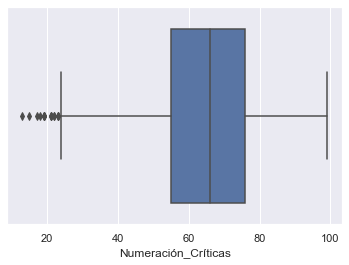

In [41]:
sns.boxplot(x=df['Numeración_Críticas'])


<AxesSubplot:xlabel='Puntuación_Usuario'>

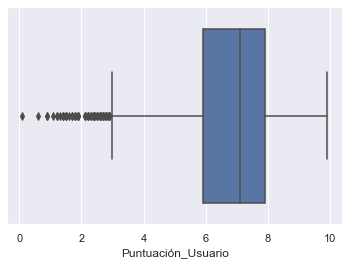

In [42]:
sns.boxplot(x=df['Puntuación_Usuario'])


,Numeración_Críticas,Puntuación_Usuario
Numeración_Críticas,1.00000,0.45377
Puntuación_Usuario,0.45377,1.00000


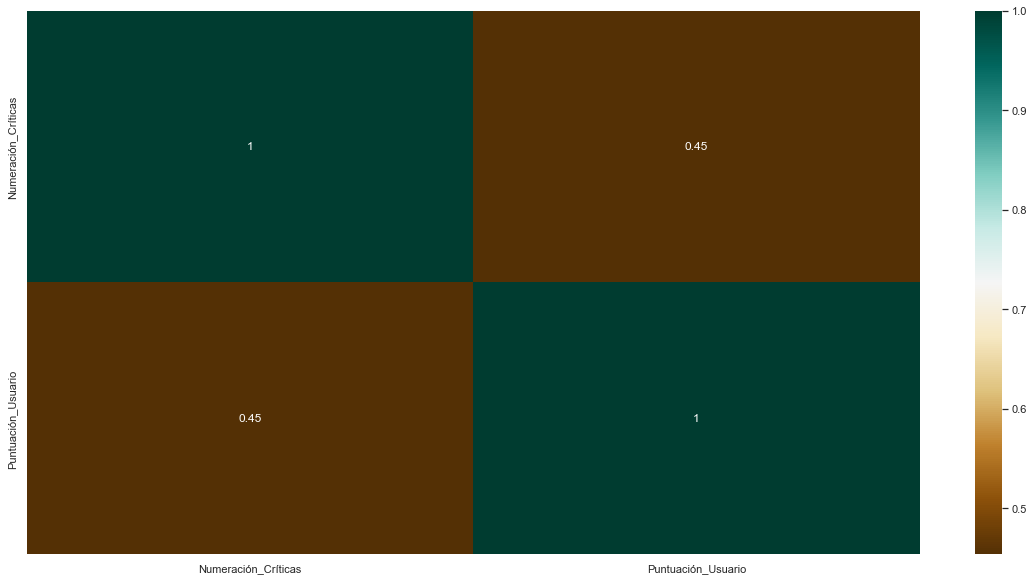

In [44]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

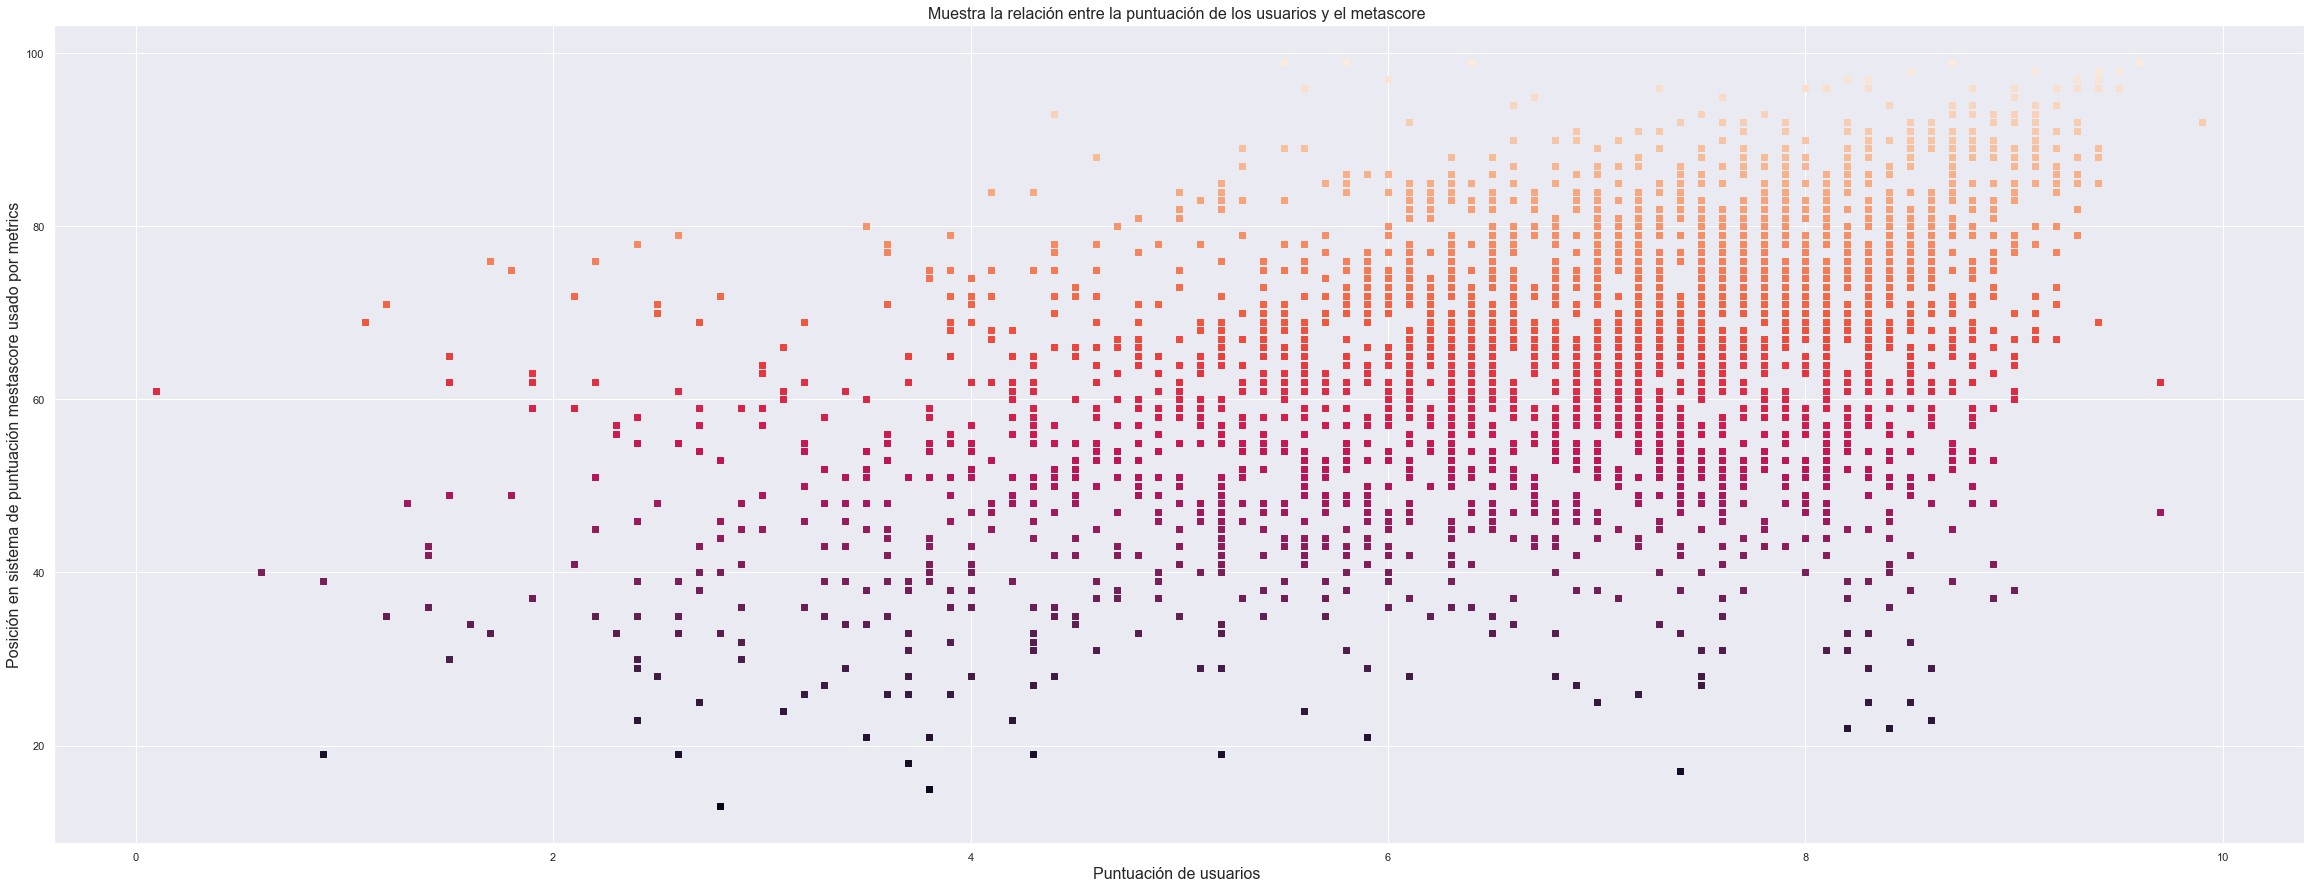

In [45]:
plt.scatter(df["Puntuación_Usuario"],df["Numeración_Críticas"],marker=",",c=df["Numeración_Críticas"])#muestra la relación entre la puntuación de los usuarios y el metascore
plt.gcf().set_size_inches(32,12)
plt.tight_layout()
plt.title("Muestra la relación entre la puntuación de los usuarios y el metascore ", fontsize=16)
plt.xlabel('Puntuación de usuarios ', fontsize=16)
plt.ylabel('Posición en sistema de puntuación mestascore usado por metrics', fontsize=16)
plt.savefig("Muestra la relación entre la puntuación de los usuarios y el metascore.jpg")
plt.grid(True)
plt.show()


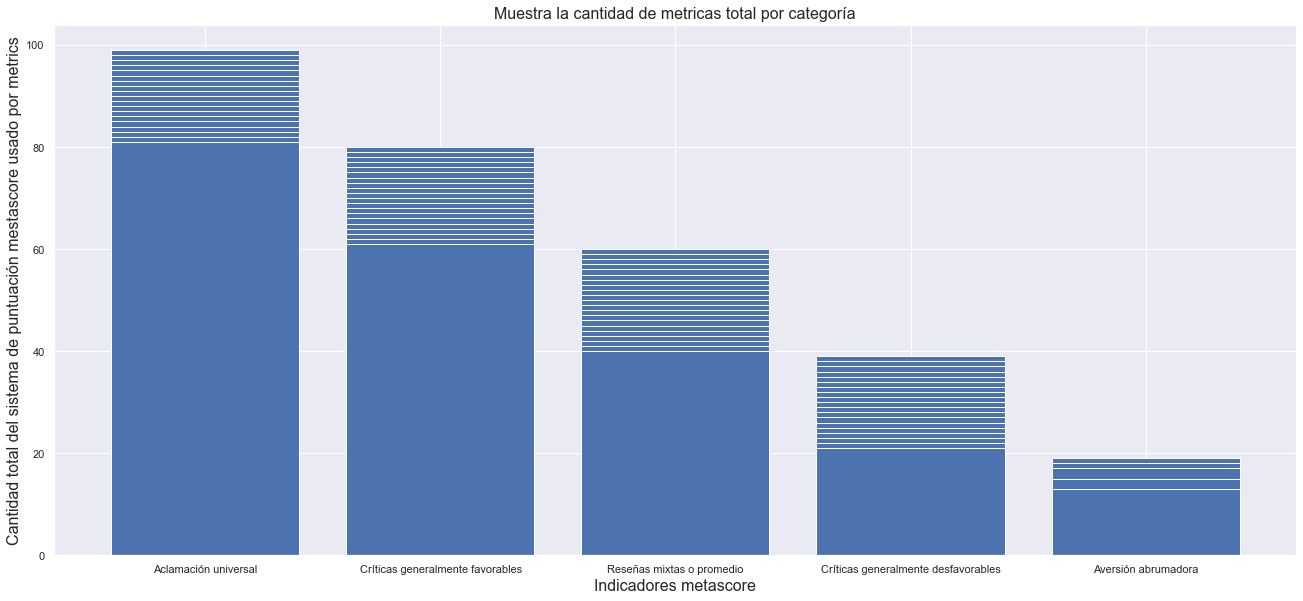

In [46]:
plt.bar(df["Categorías_Critícas_TV"],df["Numeración_Críticas"])#muestra la relación entre la puntuación de los usuarios y el metascore
plt.gcf().set_size_inches(18,8)
plt.tight_layout()
plt.title("Muestra la cantidad de metricas total por categoría", fontsize=16)
plt.xlabel('Indicadores metascore', fontsize=16)
plt.ylabel('Cantidad total del sistema de puntuación mestascore usado por metrics', fontsize=16)
plt.savefig("Muestra la cantidad de metricas total por categoría.jpg")
plt.show()


In [47]:
df1=df.groupby(['Año_Estreno'])['Numeración_Críticas'].count().reset_index()
df1=df1.sort_index( ascending = [True], na_position = 'first') # sorteamos los valores del data entorno a la fecha, la ordenamos de manera ascendente
#y determinamos la posición de los valores NaN si es que tienen en este caso es primero

In [48]:
df1.head()

,Año_Estreno,Numeración_Críticas
0,1981,1
1,1984,1
2,1986,1
3,1987,2
4,1988,4


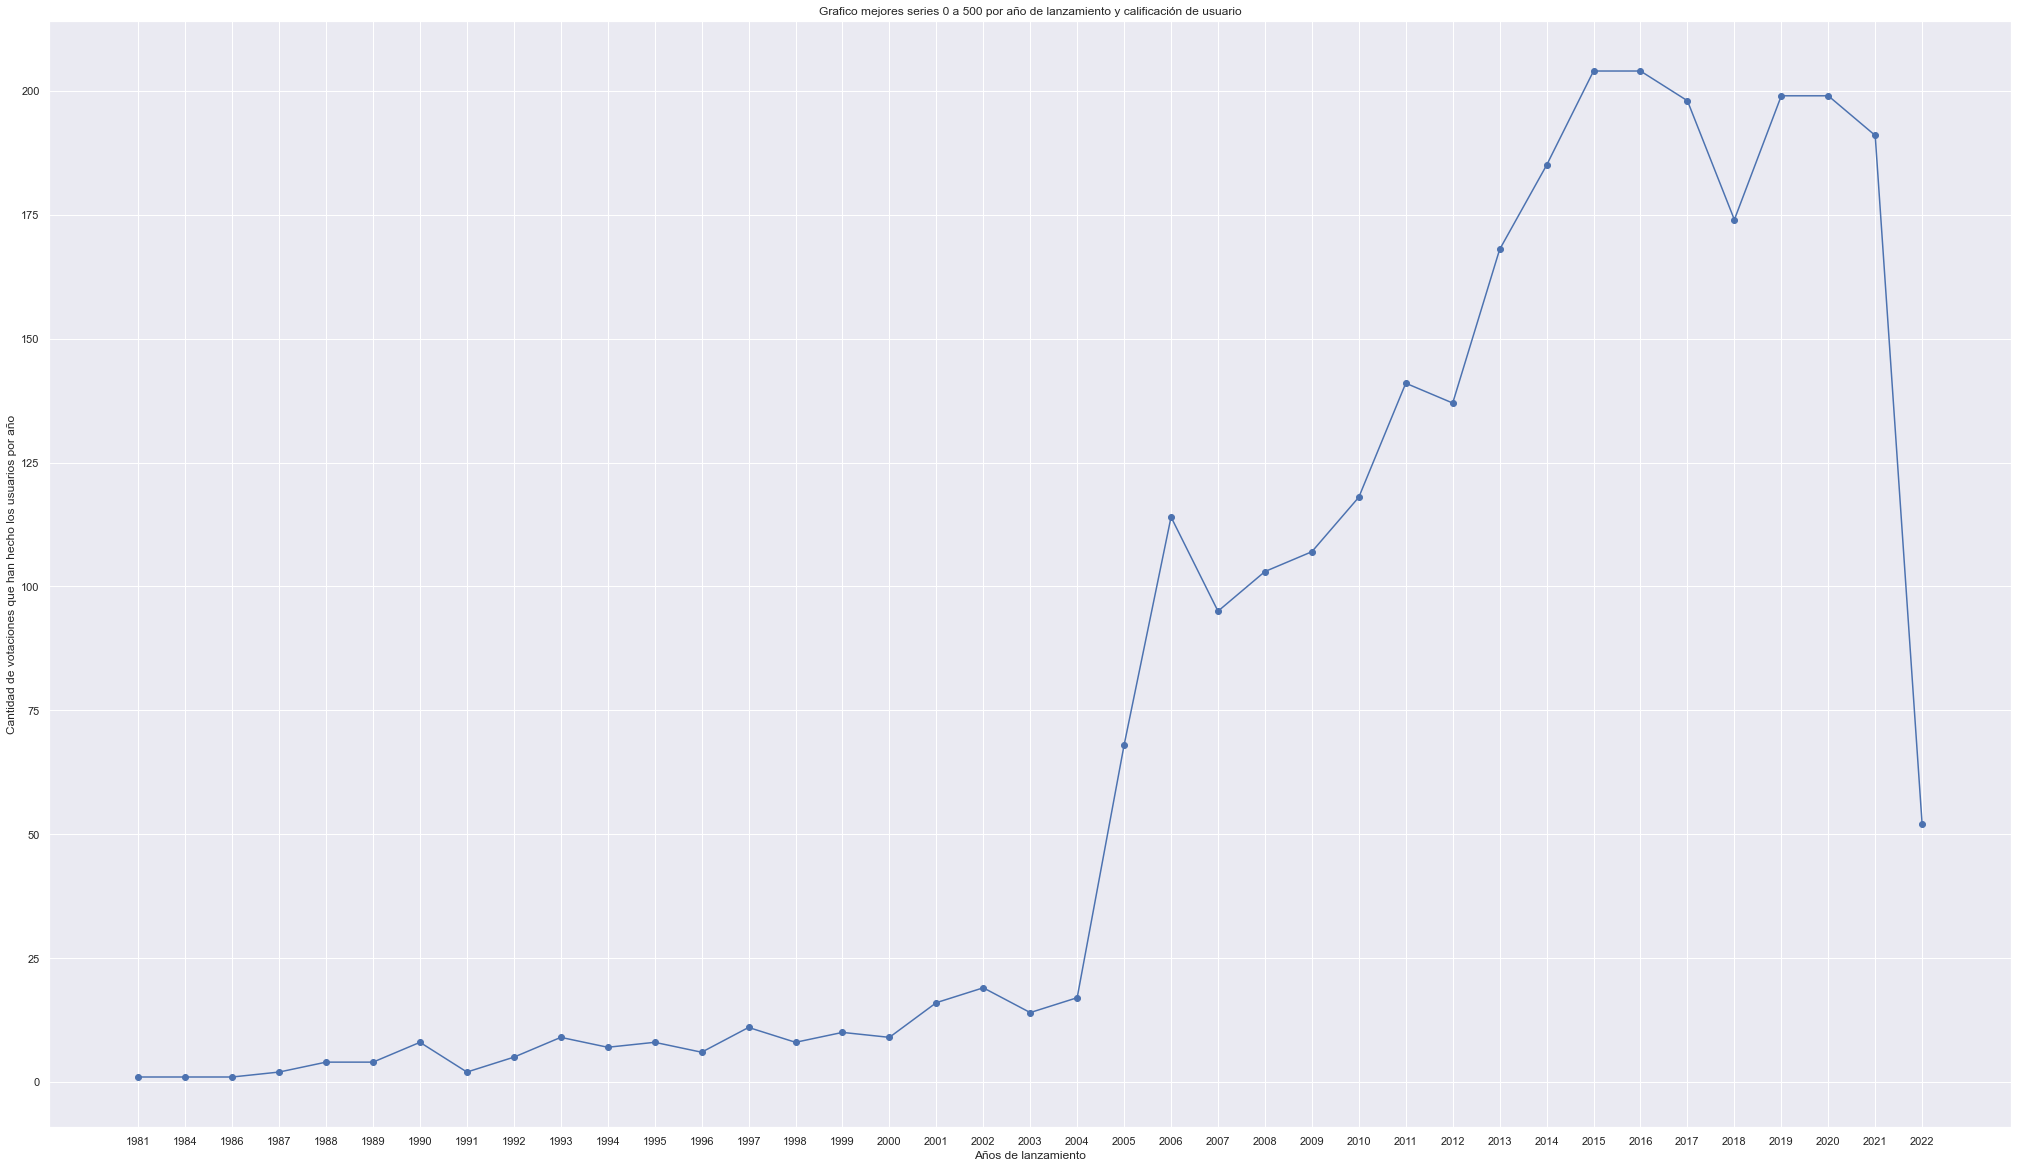

In [49]:
plt.plot_date(df1["Año_Estreno"],df1["Numeración_Críticas"],linestyle ='-')#utilizamos plot_date para representar periodos de tiempo le damos definición  a la linea del gráfico
plt.gcf().set_size_inches(28, 16)#gfc se usa para obtener la cifra actual o si no, se puede usar figure, set_size_inches es el tamaño en pulgadas, puedes usar otro tipo de medición
#y de graficos, no es necesario que lo hagas así, pero es la base. puede se grafico de barra, scater plots, graficas de lineas,  
plt.tight_layout()#ajusta automáticamente los parámetros de la subtrama para que las subtramas se ajusten al área de la figura
plt.title('Grafico mejores series 0 a 500 por año de lanzamiento y calificación de usuario', fontsize=12)#asignamos titulo del grafico
plt.xlabel('Años de lanzamiento', fontsize=12)#asignamos nombre eje x
plt.ylabel('Cantidad de votaciones que han hecho los usuarios por año' ,fontsize=12)#asignamos nombre eje y
plt.grid(True)
plt.savefig("Grafico mejores series 0 a 500 por año de lanzamiento y calificación de usuario.jpg")#sirve para guardar figuras
plt.show()

In [50]:
df.to_csv('metacritic.csv')# crear archivo casv con  la data nueva creada limpia 

In [26]:
df = pd.read_csv('D:/TI2022/metacritic.csv',sep=',', engine='python') 



In [54]:
#df.dtypes

rank                                  int64
Título_Series                        object
Fecha_Estreno                        object
Numeración_Críticas                   int64
Puntuación_Usuario                  float64
Año_Estreno                           int64
Categorías_Critícas_TV               object
Clasificación_Puntuación_Usuario     object
dtype: object

In [25]:
# Import required libraries
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect(r'D:/TI2022/metacritic.db')

# Load CSV data into Pandas DataFrame
dfDB = pd.read_csv('D:/TI2022/metacritic.csv',sep=',')
# Write the data to a sqlite table
dfDB.to_sql('metacritic', conn, if_exists='replace', index=False)

# Create a cursor object
cur = conn.cursor()
# Fetch and display result

# Close connection to SQLite database
conn.close()


In [58]:
dfDB.dtypes

rank                                  int64
title                                object
release                              object
summary                              object
metascore                             int64
userscore                           float64
link                                 object
img_url                              object
year                                  int64
Indicadores_Metascore                object
Clasificación_Puntuación_Usuario     object
dtype: object

>Esta nueva data es para hacer la nube de palabras llamar de nuevo al archivo csv

In [16]:
#df = df.drop(['img_url', 'link','title','release','metascore','userscore','year','rank','Clasificación_Puntuación_Usuario'], axis=1)
#df.head(5)

,summary,Indicadores_Metascore
0,Daniel tries to start a new life outside of Pa...,Aclamación universal
1,Comic Garry Shandling draws upon his own talk ...,Aclamación universal
2,One of several crime and law dramas created by...,Aclamación universal
3,Comic Garry Shandling draws upon his own talk ...,Aclamación universal
4,The final season for the award-winning drama b...,Aclamación universal


In [17]:
#df = df.rename(columns={"summary":"Resumen","Indicadores_Metascore":"Categorías_Critícas_TV"}) 
#df.head(5)

,Resumen,Categorías_Critícas_TV
0,Daniel tries to start a new life outside of Pa...,Aclamación universal
1,Comic Garry Shandling draws upon his own talk ...,Aclamación universal
2,One of several crime and law dramas created by...,Aclamación universal
3,Comic Garry Shandling draws upon his own talk ...,Aclamación universal
4,The final season for the award-winning drama b...,Aclamación universal


In [20]:
#df_filtrada = df.query('Categorías_Critícas_TV == "Aclamación universal"')
#df_filtrada.head()

,Resumen,Categorías_Critícas_TV
0,Daniel tries to start a new life outside of Pa...,Aclamación universal
1,Comic Garry Shandling draws upon his own talk ...,Aclamación universal
2,One of several crime and law dramas created by...,Aclamación universal
3,Comic Garry Shandling draws upon his own talk ...,Aclamación universal
4,The final season for the award-winning drama b...,Aclamación universal


In [21]:
#df_filtrada.count()

Resumen                   457
Categorías_Critícas_TV    457
dtype: int64

In [22]:
#df_filtrada.to_csv('summary_filtrado.csv')# crear archivo casv con  la data nueva creada limpia 